# Project report

- Group: 32
- Project: <b>Formula One</b>
- Members: <br>
    1. Sumukh Sharma<br>
    2. Pratik Pandey<br>
    3. Malav Parekh

## <u>Acknowledgements</u>

We would like to thank our professor, Ms. Dahlin, for her constant encouragement and support throughout this project.

## <u>Overview</u>


Formula 1 is a racing sport and the pinnacle of mechanical engineering where 10 teams (constructors) compete for the world championship. Our dataset comprises of data from 1950, the time that Formula 1 started, to 2017. As in any typical sport, the world championships of Formula 1 racing are decided by a number of parameters. Some of the parameters are qualifying race times (qualifying races usually take place before the main race to determine the starting positions of the cars for the main race) , lap times ( the time required by drivers to lap around a track once) and most importantly pit stop times (when the tires of the cars are changed, the car is refueled, any broken parts are replaced).
    
This is interesting because the person who is in front of the grid (a grid is the positioning of the cars from the start line of the race) may not necessarily win. Teams can follow a variety of different strategies, i.e., perform an undercut, overcut or push when required, in order to gain an advantage and win in the final stages of a race. 

This variation of data can be analyzed and visualized in numerous ways. Formula 1, being the bleeding edge of mechanical engineering provides a framework for the cars that are going to be designed in the future (usually the technology that is used in formula 1 cars, take a lot of time to be incorporated into normal cars) and therefore this analysis is significant.
    
Questions of Interest<br>
● How many drivers who did not start the race in the first position went on to win?<br>
● Who is the driver who has won the most number of formula 1 championships in history?<br>
● How has the pitstop times changed over the years?<br>
● How many times has a constructor(teams) won at that specific venue over the years?<br>


Expected findings<br>
● Our analysis indicates that over a period of time, there is a significant reduction in the pitstop time.<br>
● The driver who has the maximum number of race wins, points and championships is Michael Schumacher.<br>


## <u>Data Mapping and analysis<u>


  - The following information provides the Data mapping used in this project<br><br>

    1. <b> Circuits: **</b> <br>
    circuitId - Use as key<br>
    circuitRef<br>
    name<br>
    location<br>
    country – Useful to specify by country<br>
    lat - latitude<br>
    lng - longitude<br>
    alt<br>
    url<br><br>

    2. <b>Constructors: **</b> <br>
    constructorId – use as key<br>
    constructorRef<br>
    name<br>
    nationality<br>
    url<br><br>

    3. <b>Drivers: **</b> <br>
    driverId – Use as Key<br>
    driverRef<br>
    number – Fill blanks with -1<br>
    code<br>
    forename<br>
    surname<br>
    dob<br>
    nationality<br>
    url<br><br>

    4. <b>Races: **</b> <br>
    raceId – Use as Key<br>
    year – Season of the race<br>
    round – Race number in that year<br>
    circuitId – Same as Circuitid from circuit<br>
    name<br>
    date<br>
    time – Fill blanks with 10:00<br>
    url<br>
    Weather<br><br>

    5. <b>Results: ***</b> <br>
    resultId<br>
    raceId – Use key from Races<br>
    driverId – Use key from Drivers<br>
    constructorId – use key storm constructors<br>
    number – Driver number(5 for vettel, Not unique). Fill Blanks with -1<br>
    grid – Starting grid position<br>
    position – Finishing position. Fill blanks with -1 for retired cards<br>
    positionText – Position Text. R stands for retired<br>
    positionOrder – Final position order ( This ideally should be the same as position 1…n where n is
    number of cars that took part in that race)<br>
    points – Points won<br>
    laps – Number of laps driven in a race. Any driver that retired will have a lower number than those
    that finished for a specific RaceID<br>
    time<br>
    milliseconds<br>
    fastestLap – Gives fastest lap number<br>
    rank – Rank of the fastest lap times<br>
    fastestLapTime – Lap time<br>
    fastestLapSpeed – Avg speed in the fastest lap<br>
    statusId – StatusId of the car at the end of the race. Use key from Status ( Finished. Did not finish.
    Disqualified. Power unit issues. Etc.)<br><br>

    6. <b>Seasons: *</b><br>
    Year - year<br>
    url<br><br>

    7. <b>Status - **</b> <br>
    statusId – Use this as a key<br>
    status – Status of the car at the end of the race and the reason for retiring.<br><br>

    8. <b>Constructor results: *</b><br>
    constructorResultsId – Use as Key<br>
    raceId - Use key from Races<br>
    constructorId – Use key from Constructors<br>
    points – Points scored<br>
    status – Null/ D (D for disqualified)<br><br>

    9. <b>Constructor Standings:*</b><br>
    constructorStandingsId<br>
    raceId – Use key from Races<br>
    constructorId – Use key from Constructors<br>
    points – Points scored – Fill Blanks with 0<br>
    position – Position of constructor<br>
    positionText - Text<br>
    wins – Wins in that year<br><br>

   ####               * indicate the importance of the data set <br>

   ####               * : foundation data table<br>
   ####               ** : Important data table<br>
   ####               *** : Critical data table<br><br>

## <u>Data Acquisition and Cleaning</u>

#### 1. Utilised the NumPy and Pandas modules in order to transform data.
#### 2. Worked on 11 .csv files relevant to this project and stored them in DataFrames 
#### 3. There were three .csv files ('circuits.csv', 'pitStops.csv' and 'drivers.csv') in TextIOWrapper form that have been converted into DataFrames, cleaned and indexed.
#### 4. We have created and worked on copies of the above mentioned DataFrames. Doing so allowed us to retrieve the original data whenever needed.
#### 5. Managed missing values and eliminated NaN values for the DataFrames, including the most important DataFrame 'results' (its copy).
#### 6. Scraped data from more than 150 web pages in order to update our .csv files. Major changes have been in the constructors.csv and races.csv files.
#### 7. Performed merge operations on the DataFrames to manipulate data. Doing so, helped us arrive at answers to the above mentioned questions of interest.

In [1]:
# Importing required modules
import pandas as pd
import numpy as np

#### driverStandings.csv

In [2]:
# Reading the 'driverStandings.csv' file and creating a copy of it.
driverStandings = pd.read_csv('driverStandings.csv')
driverStandingsCopy = driverStandings.copy()

In [3]:
# Renaming its columns
driverStandingsCopy.rename(columns = {'driverStandingsId':'driverStandingsId', 'raceId':'raceId', 'driverId':'driverId',
                                      'points':'Points', 'position':'Position', 
                                      'positionText':'positionText', 'wins':'Wins'}, inplace = True)

# Setting the index to 'driverStandingsId'
driverStandingsCopy.set_index('driverStandingsId',inplace=True)

driverStandingsCopy.head()

raceId  driverId  Points  Position positionText  Wins
driverStandingsId                                                       
1                      18         1    10.0         1            1     1
2                      18         2     8.0         2            2     0
3                      18         3     6.0         3            3     0
4                      18         4     5.0         4            4     0
5                      18         5     4.0         5            5     0

#### results.csv

In [4]:
# Reading the 'results.csv' file and creating a copy of it.
results = pd.read_csv('results.csv')
resultsCopy= results.copy()

In [5]:
# Renaming its columns
resultsCopy.rename(columns = {'resultId':'resultId', 'raceId':'raceId', 'driverId':'driverId',
                                      'constructorId':'constructorId', 'number':'Number', 'grid': 'Grid',
                              'position':'Position', 'positionText':'positionText', 'positionOrder': 'Position order',
                              'points':'Points', 'laps':'Laps', 'time':'Time','milliseconds':'Time in milliseconds',
                             'fastestLap': 'Fastest Lap', 'rank': 'Rank', 'fastestLapTime': 'Fastest Lap Time',
                             'fastestLapSpeed':'Fastest Lap Speed', 'statusId':'statusId'}, inplace = True)

resultsCopy.set_index('resultId',inplace=True)

In [6]:
#Handling null values for multiple columns in 'results.csv'
values = {'Position': -1, 'Number': -1, 'Time': 0, 'Time in milliseconds': 0}
resultsCopy.fillna(value=values).head()


raceId  driverId  constructorId  Number  Grid  Position  \
resultId                                                            
1             18         1              1    22.0     1       1.0   
2             18         2              2     3.0     5       2.0   
3             18         3              3     7.0     7       3.0   
4             18         4              4     5.0    11       4.0   
5             18         5              1    23.0     3       5.0   

         positionText  Position order  Points  Laps     Time  \
resultId                                                       
1                   1               1    10.0    58  34:50.6   
2                   2               2     8.0    58    5.478   
3                   3               3     6.0    58    8.163   
4                   4               4     5.0    58   17.181   
5                   5               5     4.0    58   18.014   

          Time in milliseconds  Fastest Lap  Rank Fastest Lap Time  \
resultId                                                             
1                    5690616.0         39.0   2.0          01:27.5   
2                    5696094.0         41.0   3.0          01:27.7   
3                    5698779.0         41.0   5.0          01:28.1   
4                    5707797.0         58.0   7.0          01:28.6   
5                    5708630.0         43.0   1.0          01:27.4   

         Fastest Lap Speed  statusId  
resultId                              
1                    218.3         1  
2                  217.586         1  
3                  216.719         1  
4                  215.464         1  
5                  218.385         1

#### circuits.csv

In [7]:
# Opening the circuits.csv file
# It is a TextIO Wrapper file
circuitsWrapper = open('circuits.csv', encoding = "ISO-8859-1")
circuits = pd.DataFrame(circuitsWrapper)


In [8]:
# Appending the valuesinto a list
list_circuits=[]
# Since the values are comma seperated and stored in a list, we split them
rowLabels_circuits=circuits[0][0].split(',')
# Looping through the length of the DataFrame
for i in range(1,74):
    values=circuits[0][i].split(',')
    list_circuits.append(values)
# Storing the newly appended list in a DataFrame
circuitsUpdated=pd.DataFrame(list_circuits)  

In [9]:
# Creating a copy of the above created DataFrame
circuitsCopy= circuitsUpdated.copy()

In [10]:
# Renaming the columns
circuitsCopy.rename(columns = {0:'circuitId', 1:'CircuitRef', 2:'Name', 3:'Location', 
                               4:'country', 5:'Latitude', 6:'Longitude', 7:'Altitude', 8:'URL'}, inplace = True)

In [11]:
# Setting the index as 'circuitId'
circuitsCopy.set_index('circuitId',inplace=True)

In [12]:
# # Dropping redundant columns
circuitsCopy.drop(['Altitude', 9], axis=1, inplace=True)
circuitMap=circuitsCopy
circuitsCopy.head()

CircuitRef                            Name      Location  \
circuitId                                                              
1          albert_park  Albert Park Grand Prix Circuit     Melbourne   
2               sepang    Sepang International Circuit  Kuala Lumpur   
3              bahrain   Bahrain International Circuit        Sakhir   
4            catalunya  Circuit de Barcelona-Catalunya     MontmelÌ_   
5             istanbul                   Istanbul Park      Istanbul   

             country  Latitude Longitude  \
circuitId                                  
1          Australia  -37.8497   144.968   
2           Malaysia   2.76083   101.738   
3            Bahrain   26.0325   50.5106   
4              Spain     41.57   2.26111   
5             Turkey   40.9517    29.405   

                                                         URL  
circuitId                                                     
1          http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
2          http://en.wikipedia.org/wiki/Sepang_Internatio...  
3          http://en.wikipedia.org/wiki/Bahrain_Internati...  
4          http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
5               http://en.wikipedia.org/wiki/Istanbul_Park\n

#### constructorResults.csv

In [13]:
# Reading the 'constructorResults.csv' file and creating a copy of it.
constructorResults = pd.read_csv('constructorResults.csv')
constructorResultsCopy= constructorResults.copy()

In [14]:
# Renaming its columns
constructorResultsCopy.rename(columns = {'constructorResultsId':'constructorResultsId', 'raceId':'raceId',
                                         'constructorId':'constructorId', 'points':'Points', 
                               'status':'Status', 5:'Latitude', 6:'Longitude', 7:'Altitude', 8:'URL'}, inplace = True)

# Setting the index
constructorResultsCopy.set_index('constructorResultsId', inplace=True)

In [15]:
#Handling null values
values = {'Status': 'NULL'}
constructorResultsCopy.fillna(value=values).head()

raceId  constructorId  Points Status
constructorResultsId                                      
1                         18              1    14.0   NULL
2                         18              2     8.0   NULL
3                         18              3     9.0   NULL
4                         18              4     5.0   NULL
5                         18              5     2.0   NULL

#### constructors.csv

In [16]:
# Reading the 'constructors.csv' file and creating a copy of it.
constructors = pd.read_csv('constructors.csv')
constructorCopy= constructors.copy()
constructorCopy.head()

constructorId constructorRef        name nationality  \
0              1        mclaren     McLaren     British   
1              2     bmw_sauber  BMW Sauber      German   
2              3       williams    Williams     British   
3              4        renault     Renault      French   
4              5     toro_rosso  Toro Rosso     Italian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/BMW_Sauber  
2  http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3            http://en.wikipedia.org/wiki/Renault_F1  
4   http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso

In [17]:
# Renaming the columns
constructorCopy.rename(columns = {'constructorId':'constructorId', 'constructorRef':'ConstructorRef',
                                         'name':'Name', 'nationality':'Nationality', 'url':'URL',
                                  'Unnamed: 5':'Unnamed: 5'}, inplace = True)

In [18]:
constructorCopy.head()

constructorId ConstructorRef        Name Nationality  \
0              1        mclaren     McLaren     British   
1              2     bmw_sauber  BMW Sauber      German   
2              3       williams    Williams     British   
3              4        renault     Renault      French   
4              5     toro_rosso  Toro Rosso     Italian   

                                                 URL  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/BMW_Sauber  
2  http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3            http://en.wikipedia.org/wiki/Renault_F1  
4   http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso

#### constructorStandings.csv

In [19]:
# Reading the 'constructorStandings.csv' file and creating a copy of it.
constructorStandings = pd.read_csv('constructorStandings.csv')
constructorStandingsCopy = constructorStandings.copy()

In [20]:
# Renaming the columns
constructorStandingsCopy.rename(columns = {'constructorStandingsId':'constructorStandingsId', 'raceId':'raceId',
                                         'constructorId':'constructorId', 'points':'Points', 'position':'Position',
                                  'positionText':'positionText','wins':'Wins', 'Unnamed: 7':'Unnamed: 7'}, inplace = True)

# Setting the index
constructorStandingsCopy.set_index('constructorStandingsId',inplace=True)

In [21]:
constructorStandingsCopy.head()

raceId  constructorId  Points  Position positionText  \
constructorStandingsId                                                         
1                           18              1    14.0         1            1   
2                           18              2     8.0         3            3   
3                           18              3     9.0         2            2   
4                           18              4     5.0         4            4   
5                           18              5     2.0         5            5   

                        Wins  
constructorStandingsId        
1                          1  
2                          0  
3                          0  
4                          0  
5                          0

#### drivers.csv

In [22]:
# Opeing the 'drivers.csv' TextIOWrapper file
driversWrapper = open('drivers.csv', encoding = "ISO-8859-1")
drivers = pd.DataFrame(driversWrapper)

In [23]:
# Creating a list
list_drivers=[]
# Splitting the comma seperated values
rowLabels_drivers=drivers[0][0].split(',')
# Looping through the length of the DataFrame
for i in range(1,843):
    values=drivers[0][i].split(',')
    # Appending the values to the list
    list_drivers.append(values)
# Creating a new DataFrame by using the list
driversUpdated=pd.DataFrame(list_drivers)  

In [24]:
# Creating a copy of the DataFrame
driversCopy= driversUpdated.copy()

In [25]:
# Renaming the columns
driversCopy.rename(columns = {0:'driverId', 1:'DriverRef', 2:'Number', 3:'Code', 
                               4:'Forename', 5:'Surname', 6:'DOB', 7:'Nationality', 8:'URL'}, inplace = True)

In [26]:
# Setting the index
driversCopy.set_index('driverId',inplace=True)

In [27]:
# Dropping redundant column
driversCopy.drop([9], axis=1, inplace=True) 
driversCopy.head()

DriverRef Number Code  Forename     Surname         DOB  \
driverId                                                             
1           hamilton     44  HAM     Lewis    Hamilton  07/01/1985   
2           heidfeld         HEI      Nick    Heidfeld  10/05/1977   
3            rosberg      6  ROS      Nico     Rosberg  27/06/1985   
4             alonso     14  ALO  Fernando      Alonso  29/07/1981   
5         kovalainen         KOV    Heikki  Kovalainen  19/10/1981   

         Nationality                                               URL  
driverId                                                                
1            British     http://en.wikipedia.org/wiki/Lewis_Hamilton\n  
2             German      http://en.wikipedia.org/wiki/Nick_Heidfeld\n  
3             German       http://en.wikipedia.org/wiki/Nico_Rosberg\n  
4            Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso\n  
5            Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen\n

In [28]:
# Opening the 'pitStops.csv' file and creating a copy of it after converting it to DataFrame from TextIOWrapper.
pitStopsWrapper = open('pitStops.csv', encoding = "ISO-8859-1")
pitStops = pd.DataFrame(pitStopsWrapper)

In [29]:
# Create a list
list_pitStops=[]
# Splitting the comma seperated values in the wrapper file
rowLabels_pitStops=pitStops[0][0].split(',')
# Looping through the length of the Dataframe
for i in range(1,6252):
    values=pitStops[0][i].split(',')
    # Appending the values to the list
    list_pitStops.append(values)
# Creating a new DataFrame and adding the list to it
pitStopsUpdated=pd.DataFrame(list_pitStops)  

In [30]:
# Creating a copy of the DataFrame
pitStopsCopy= pitStopsUpdated.copy()

In [31]:
# Renaming the columns
pitStopsCopy.rename(columns = {0:'raceId', 1:'driverId', 2:'Stop', 3:'Lap', 
                               4:'Time', 5:'Duration', 6:'Duration in milliseconds'}, inplace = True)

In [32]:
# Setting the index
pitStopsCopy.set_index('raceId',inplace=True)

In [33]:
pitStopsCopy.head()

driverId Stop Lap      Time Duration Duration in milliseconds
raceId                                                              
841         153    1   1  17:05:23   26.898                  26898\n
841          30    1   1  17:05:52   25.021                  25021\n
841          17    1  11  17:20:48   23.426                  23426\n
841           4    1  12  17:22:34   23.251                  23251\n
841          13    1  13  17:24:10   23.842                  23842\n

#### races.csv

In [34]:
# Reading the 'races.csv' file and creating a copy of it
races = pd.read_csv('races.csv')
racesCopy = races.copy()

In [35]:
# Renaming the columns
racesCopy.rename(columns = {'raceId':'raceId', 'year':'Year','round':'Round', 'circuitId':'circuitId', 'name':'Name',
                                  'date':'Date','time':'Time', 'url':'URL'}, inplace = True)
# Setting the index
racesCopy.set_index('raceId',inplace=True)
race2=racesCopy
racesCopy.head()

Year  Round  circuitId                   Name       Date      Time  \
raceId                                                                       
1       2009      1          1  Australian Grand Prix  3/29/2009   6:00:00   
2       2009      2          2   Malaysian Grand Prix   4/5/2009   9:00:00   
3       2009      3         17     Chinese Grand Prix  4/19/2009   7:00:00   
4       2009      4          3     Bahrain Grand Prix  4/26/2009  12:00:00   
5       2009      5          4     Spanish Grand Prix  5/10/2009  12:00:00   

                                                      URL Weather  
raceId                                                             
1       http://en.wikipedia.org/wiki/2009_Australian_G...   Sunny  
2       http://en.wikipedia.org/wiki/2009_Malaysian_Gr...   Rainy  
3       http://en.wikipedia.org/wiki/2009_Chinese_Gran...   Rainy  
4       http://en.wikipedia.org/wiki/2009_Bahrain_Gran...   Sunny  
5       http://en.wikipedia.org/wiki/2009_Spanish_Gran...   Sunny

#### seasons.csv

In [36]:
# Reading the 'seasons.csv' file and creating a copy of it
seasons = pd.read_csv('seasons.csv')
seasonsCopy= seasons.copy()

In [37]:
# Renaming the columns
seasonsCopy.rename(columns = {'year':'Year','url':'URL'}, inplace = True)

# Setting the index
seasonsCopy.set_index('Year',inplace=True)
seasonsCopy.head()

URL
Year                                                   
2009  http://en.wikipedia.org/wiki/2009_Formula_One_...
2008  http://en.wikipedia.org/wiki/2008_Formula_One_...
2007  http://en.wikipedia.org/wiki/2007_Formula_One_...
2006  http://en.wikipedia.org/wiki/2006_Formula_One_...
2005  http://en.wikipedia.org/wiki/2005_Formula_One_...

#### status.csv

In [38]:
# Reading the 'status.csv' file and creating a copy of it
status = pd.read_csv('status.csv')
statusCopy = status.copy()

In [39]:
# Renaming the columns
statusCopy.rename(columns = {'statusId':'statusId','status':'Status'}, inplace = True)

# Setting the index
statusCopy.set_index('statusId',inplace=True)
statusCopy.head()

Status
statusId              
1             Finished
2         Disqualified
3             Accident
4            Collision
5               Engine

### End of data import and cleaning; beginning of the analysis.

## <u>Analysis 1:</u> How many drivers, who did not start the race in the first position, went on to win the race?

In [40]:
print("Number of winners: "+str(len(results[results['position'] == 1.0])))

Number of winners: 979


In [41]:
resultsCopy=resultsCopy[resultsCopy['Position'] == 1.0]


In [42]:

resultsCopy=resultsCopy[resultsCopy['Grid'] != 1]


In [43]:
print("Number of winners who were not in grid position 1: "+str(len(resultsCopy)))

Number of winners who were not in grid position 1: 572


### From the above data, we can infer that the number of drivers who won the race even after not starting in pole position was 572 out of 979. A result of 58.4% does not provide a satisfactory depth of analysis. In order to generate the required analysis, we focused attention on drivers who did not start in the first 3 positions during the start of the race but still went on to win the race.

In [44]:
required_drivers = resultsCopy[resultsCopy['Grid'] > 3].sort_values('Grid',ascending=False).drop_duplicates(subset='Grid',keep='first')
required_drivers

raceId  driverId  constructorId  Number  Grid  Position  \
resultId                                                            
10684        453       187              1     7.0    22       1.0   
19232        800       657            113    14.0    19       1.0   
3150         168        22              6     4.0    18       1.0   
11250        473       187              1     7.0    17       1.0   
4971         250        30             22     1.0    16       1.0   
289           32         4              4     5.0    15       1.0   
3590         188        65             24    17.0    14       1.0   
18758        778       611            108     9.0    13       1.0   
17913        741       394              6    50.0    12       1.0   
13251        543       222             59    20.0    11       1.0   
10078        430       182              1     1.0    10       1.0   
13678        558       222             59    20.0     9       1.0   
15934        645       358             32     3.0     8       1.0   
2667         146        14              1     4.0     7       1.0   
22262        906       817              9     3.0     6       1.0   
15340        621       304              1    12.0     5       1.0   
6447         304        77              1     2.0     4       1.0   

         positionText  Position order  Points  Laps     Time  \
resultId                                                       
10684               1               1     9.0    75  53:34.9   
19232               1               1     8.0   200  49:17.3   
3150                1               1    10.0    45  25:34.4   
11250               1               1     9.0    62  58:41.0   
4971                1               1    10.0    44  36:47.9   
289                 1               1    10.0    61  57:16.3   
3590                1               1    10.0    66  41:54.3   
18758               1               1     8.0   200  41:14.3   
17913               1               1     9.0    52  14:17.5   
13251               1               1     9.0    53  40:11.2   
10078               1               1     9.0    70  32:29.3   
13678               1               1     9.0    80  40:00.0   
15934               1               1     9.0    80  54:37.4   
2667                1               1    10.0    71  27:45.9   
22262               1               1    25.0    70  39:12.8   
15340               1               1     9.0    79  45:49.1   
6447                1               1    10.0    81  46:54.8   

          Time in milliseconds  Fastest Lap  Rank Fastest Lap Time  \
resultId                                                             
10684                6814889.0          NaN   NaN              NaN   
19232               13757270.0          NaN   NaN              NaN   
3150                 5134418.0          NaN   NaN              NaN   
11250                7121043.0          NaN   NaN              NaN   
4971                 5807875.0          NaN   NaN              NaN   
289                  7036304.0         55.0   3.0          01:45.8   
3590                 6114314.0          NaN   NaN              NaN   
18758               13274250.0          NaN   NaN              NaN   
17913                8057500.0          NaN   NaN              NaN   
13251                6011190.0          NaN   NaN              NaN   
10078                5549263.0          NaN   NaN              NaN   
13678                6000000.0          NaN   NaN              NaN   
15934                6877400.0          NaN   NaN              NaN   
2667                 5265927.0          NaN   NaN              NaN   
22262                5952830.0         68.0   4.0          01:18.6   
15340                6349100.0          NaN   NaN              NaN   
6447                 6414786.0          NaN   NaN              NaN   

         Fastest Lap Speed  statusId  
resultId                              
10684                  NaN         1  
19232                  NaN       

###  Filtering out the drivers who started a race in first three grid positions, we have 17 entries out 979, a massive drop in proportion from 58.4% to 1.7%. This statistic shows how difficult it is to win a race from grid position 4 and above.

### However, some drivers have managed to win despite impossible odds.

### We would like to highlight some of those drivers. Our analysis focuses on the drivers who started from the 15th position and above and still went on to win a race.

In [45]:
required_drivers = resultsCopy[resultsCopy['Grid'] > 15].sort_values('Grid',ascending=False).drop_duplicates(subset='Grid',keep='first')
required_drivers

raceId  driverId  constructorId  Number  Grid  Position  \
resultId                                                            
10684        453       187              1     7.0    22       1.0   
19232        800       657            113    14.0    19       1.0   
3150         168        22              6     4.0    18       1.0   
1475          88         8              1     9.0    17       1.0   
4971         250        30             22     1.0    16       1.0   

         positionText  Position order  Points  Laps     Time  \
resultId                                                       
10684               1               1     9.0    75  53:34.9   
19232               1               1     8.0   200  49:17.3   
3150                1               1    10.0    45  25:34.4   
1475                1               1    10.0    53  29:02.2   
4971                1               1    10.0    44  36:47.9   

          Time in milliseconds  Fastest Lap  Rank Fastest Lap Time  \
resultId                                                             
10684                6814889.0          NaN   NaN              NaN   
19232               13757270.0          NaN   NaN              NaN   
3150                 5134418.0          NaN   NaN              NaN   
1475                 5342212.0         44.0   1.0          01:31.5   
4971                 5807875.0          NaN   NaN              NaN   

         Fastest Lap Speed  statusId  
resultId                              
10684                  NaN         1  
19232                  NaN         1  
3150                   NaN         1  
1475               228.372         1  
4971                   NaN         1

In [46]:
df=pd.DataFrame()
df = [ driversCopy[driversCopy.index == j] for i in required_drivers['driverId'] for j in driversCopy.index if int(j) == i]
#df

In [47]:
drivers_url=[]
for i in range(len(df)):
   
    drivers_url.append(df[i].URL)

In [48]:
from bs4 import BeautifulSoup
import requests

In [49]:
from IPython.display import Image

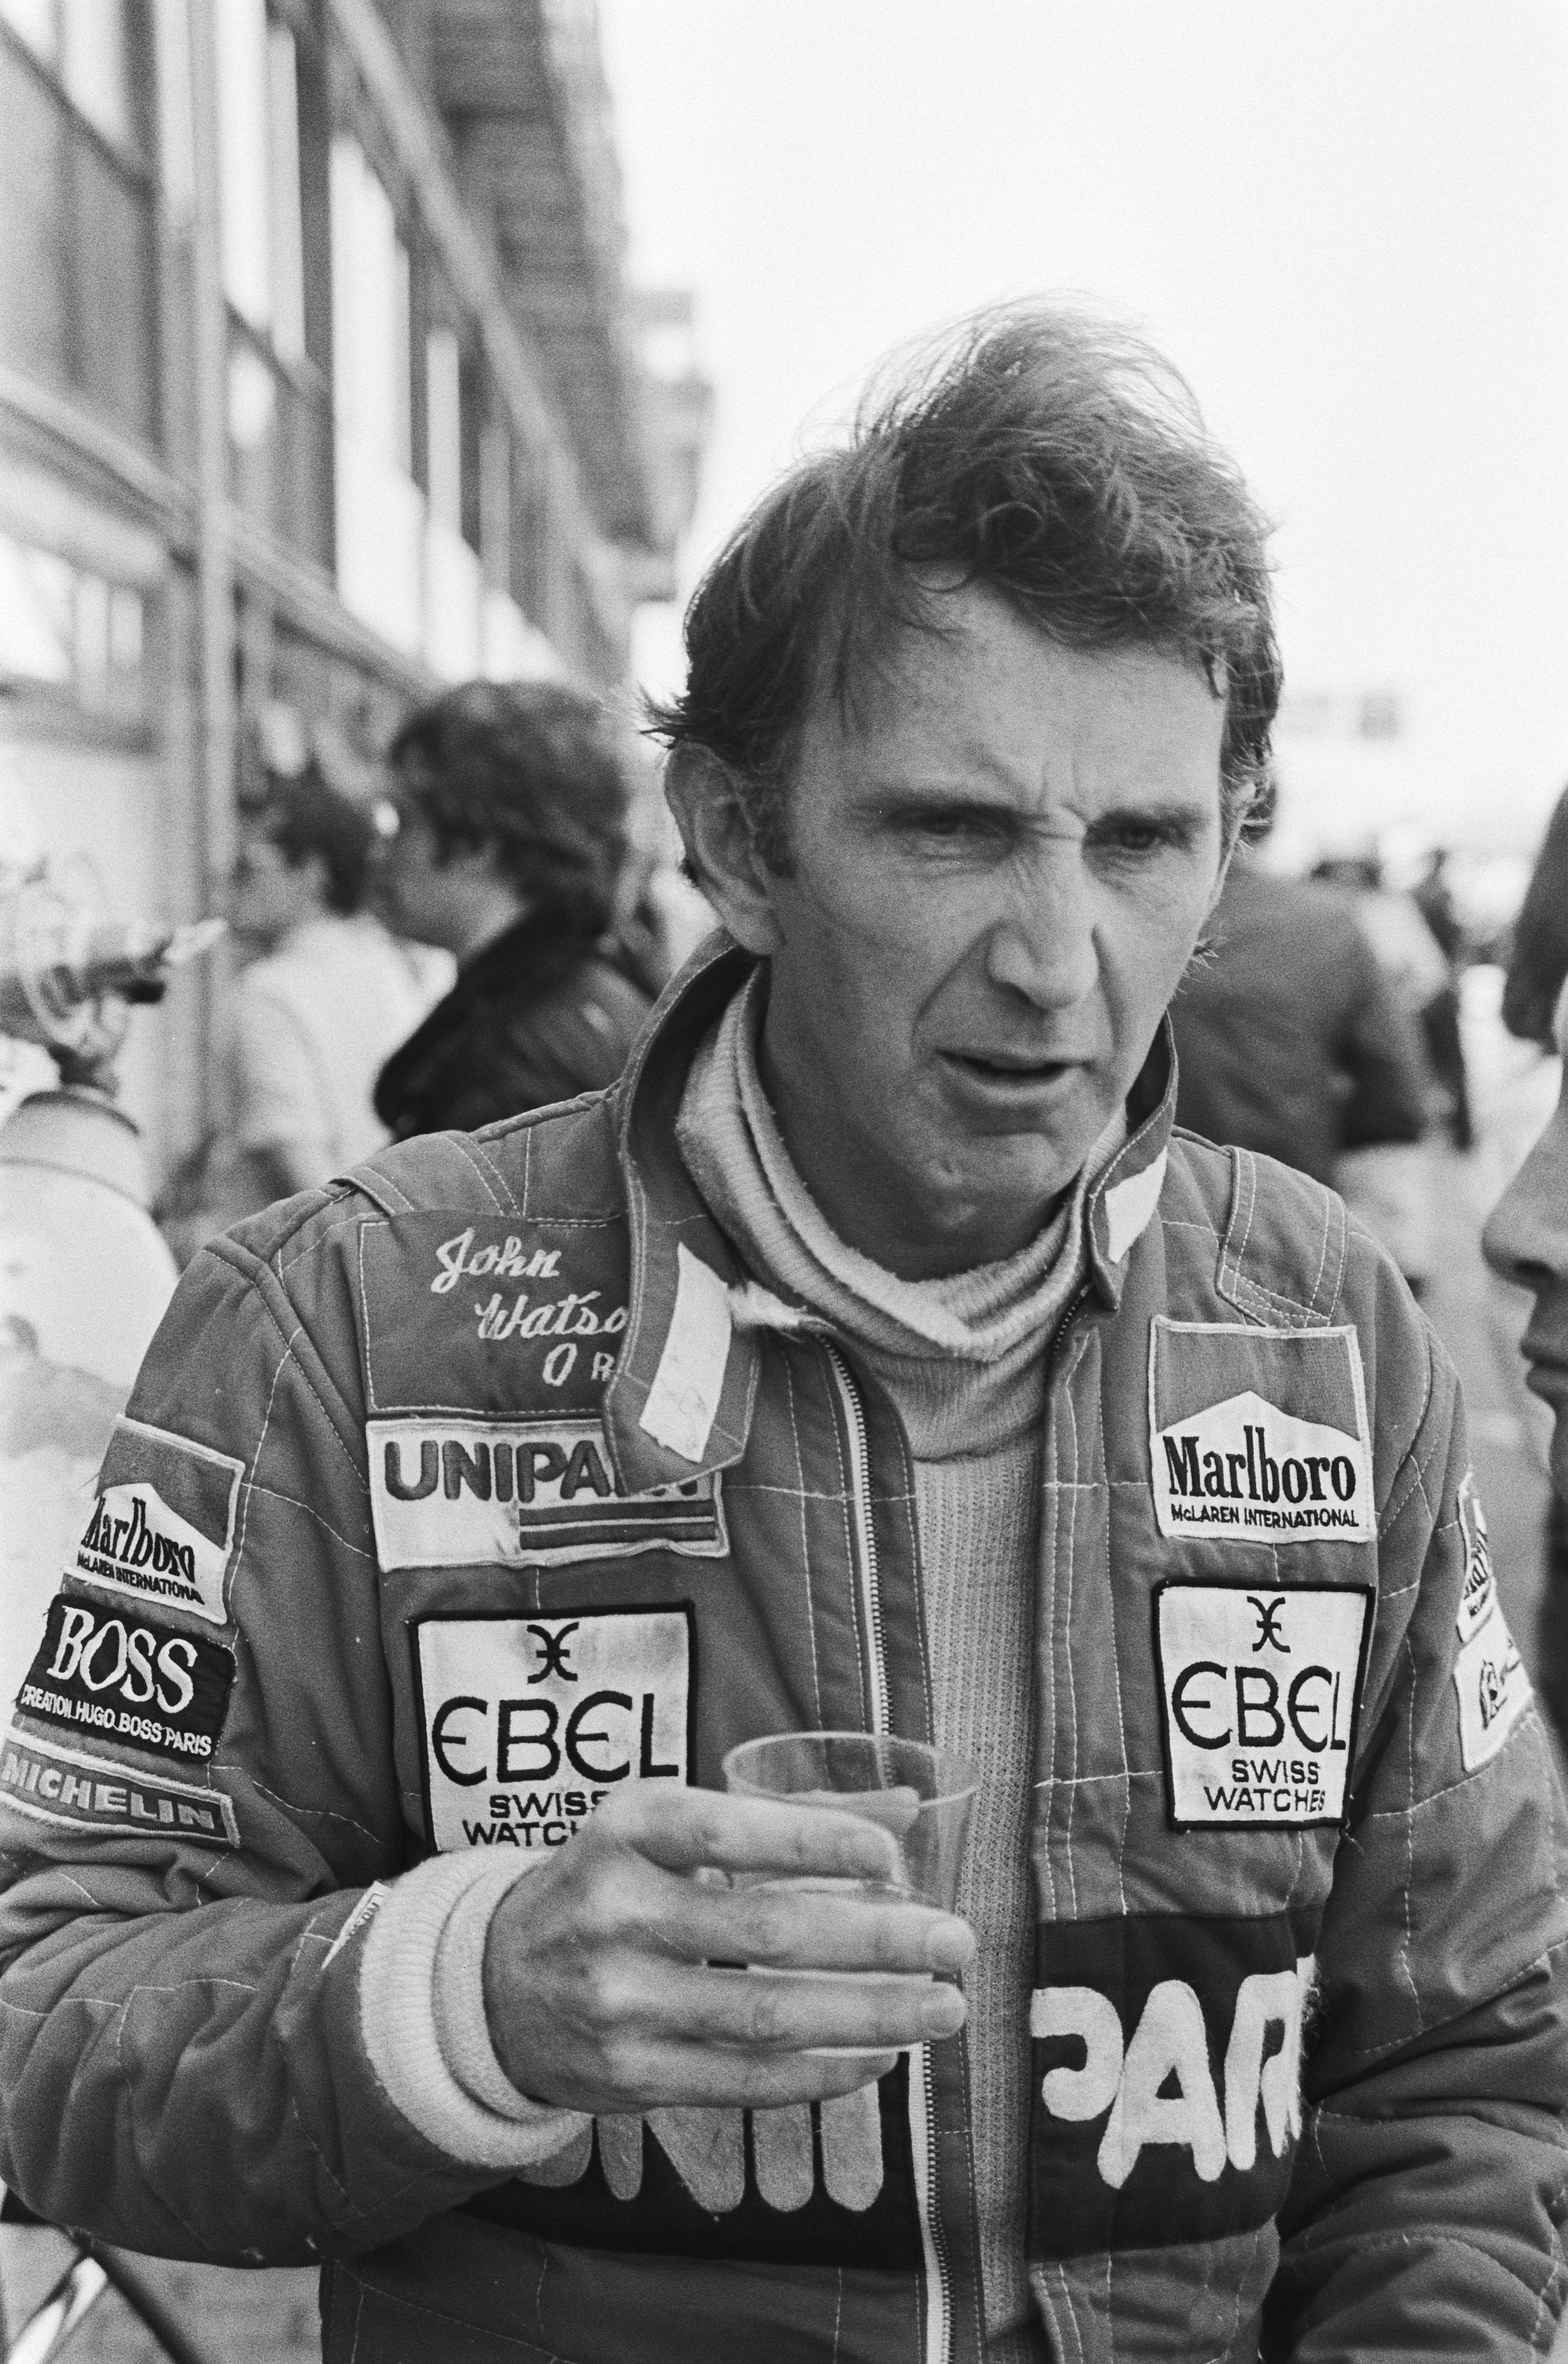

In [50]:
path = "/Users/prati/FormulaOne/Images/"
Image(filename = path + "Watson.jpg", width=250, height=250)

### John Watson
- United States Grand Prix, 1983
- Starting Grid position: 22

### Fun fact: John Watson and Niki Lauda were part of the same team (McLaren-Ford) during the United States Grand Prix of 1983. They started the race in grid positions 22 and 23 respectively and went on to finish 1st and 2nd. This feat has never been achieved by any other constructor ever again.

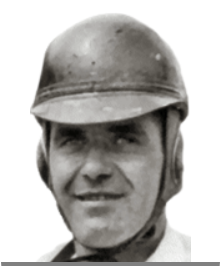

In [51]:
Image(filename = path + "Cross.png", width=250, height=250)

### Art Cross
- Indianapolis 500, 1954
- Starting Grid Position: 19

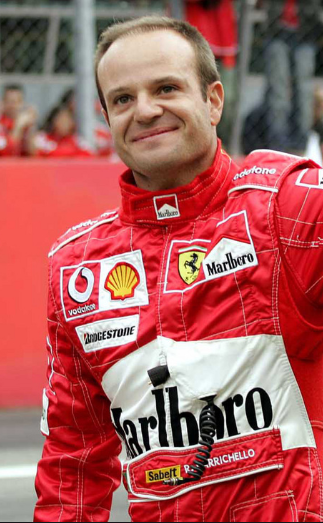

In [52]:
Image(filename = path + "Barrichello.png", width=250, height=250)

### Rubens Barrichello
- German Grand Prix, 2000
- Grid Position: 18

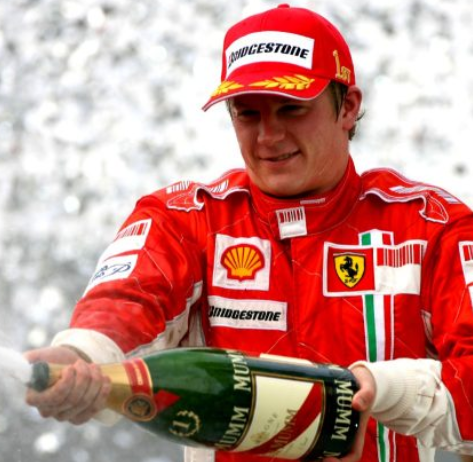

In [53]:
Image(filename = path + "Raikkonen.png", width=250, height=250)

### Kimi "Iceman" Raikkonen
- Japanese Grand Prix, 2005
- Starting Grid Position: 17

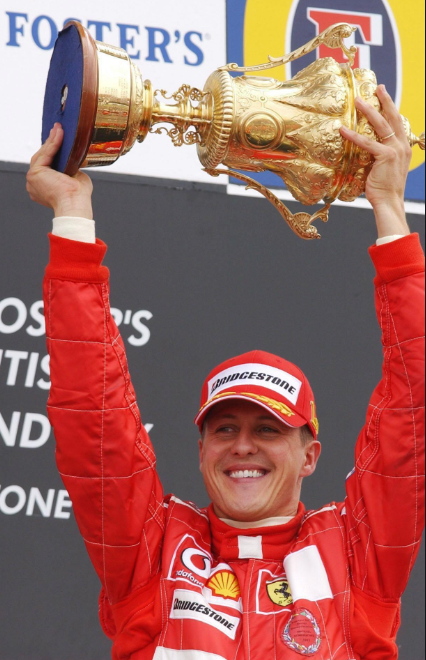

In [54]:
Image(filename = path + "Schumi.png", width=250, height=250)

### Michael "Schumi" Schumacher
- Belgian Grand Prix, 1995
- Starting Grid Position: 16

## <u>Analysis 2:</u> Who is the driver who has won the most number of Formula 1 championships in history?

In [55]:
pit_time_list1 = pd.DataFrame(pitStopsCopy.loc['881']['Duration'])
mean_list_for_a_race1 = pit_time_list1['Duration'].astype(float).mean()

#mean_list_for_a_race1

In [56]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 99)

driverStandingsCopy = driverStandingsCopy.fillna(0)

In [57]:
driver_wins = {}
for index, row in driverStandingsCopy.iterrows():
    if row["Position"] == 1:
        if row["driverId"] in driver_wins.keys():
            driver_wins[row["driverId"]] += 1
        else:
            driver_wins[row["driverId"]] = 1
#driver_wins

In [58]:
driverStandingsDf= pd.DataFrame(driverStandingsCopy)

driversDf= pd.DataFrame(driversCopy)



In [59]:
driverStandingsDf=driverStandingsDf.sort_values('driverId')

In [60]:
driversCopy.head()

DriverRef Number Code  Forename     Surname         DOB  \
driverId                                                             
1           hamilton     44  HAM     Lewis    Hamilton  07/01/1985   
2           heidfeld         HEI      Nick    Heidfeld  10/05/1977   
3            rosberg      6  ROS      Nico     Rosberg  27/06/1985   
4             alonso     14  ALO  Fernando      Alonso  29/07/1981   
5         kovalainen         KOV    Heikki  Kovalainen  19/10/1981   

         Nationality                                               URL  
driverId                                                                
1            British     http://en.wikipedia.org/wiki/Lewis_Hamilton\n  
2             German      http://en.wikipedia.org/wiki/Nick_Heidfeld\n  
3             German       http://en.wikipedia.org/wiki/Nico_Rosberg\n  
4            Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso\n  
5            Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen\n

In [61]:
driversCopy.reset_index(inplace=True)

In [62]:
driversCopy['driverId']=driversCopy['driverId'].astype('int')

In [63]:
data=pd.merge(driverStandingsCopy, driversCopy, on='driverId', how='left')
#data

In [64]:
data.groupby(['DriverRef']).count().sort_values(by='Wins', ascending=False, inplace=True)
#data

In [65]:
data = data[data["Position"]==1]
data["Surname"].value_counts()

Schumacher     121
Prost           79
Hamilton        70
Vettel          57
Alonso          52
Hill            48
Senna           48
Lauda           42
Fangio          35
Stewart         33
Rosberg         32
Fittipaldi      28
HÌ_kkinen       27
Mansell         25
Brabham         24
Clark           22
Button          20
Piquet          19
Andretti        15
Scheckter       15
Ascari          14
Reutemann       13
Hulme           12
RÌ_ikkÌ¦nen     12
Jones           11
Rindt            8
Farina           7
Villeneuve       7
Moss             7
Alboreto         6
Webber           6
McLaren          6
Regazzoni        6
Irvine           5
Hawthorn         5
Pironi           4
Laffite          4
Coulthard        3
Watson           3
Taruffi          3
Arnoux           3
Massa            2
Collins          2
von Trips        2
de Angelis       2
Trintignant      2
RodrÌ_guez       1
Surtees          1
Hunt             1
Kubica           1
Fisichella       1
Depailler        1
Behra       

In [66]:
import matplotlib.pyplot as plt
import plotly.graph_objs as go

import chart_studio
import chart_studio.plotly as py
colors = ['grey'] * 55
colors[0] = 'crimson'

chart_studio.tools.set_credentials_file(username='pratikp', api_key='AHxozWNTaluAU7sx4YW7')

driverWins=[go.Bar(x=data["Surname"].value_counts().index, y=data["Surname"].value_counts().values, marker_color=colors)]

py.iplot(driverWins,filename='Wins by Drivers')

### Based on the bar chart plotted above, we see that Michael Schumacher stands out in terms of number of wins registered in the history of Formula One. He, in his career, has won a total of 121 races and has 7 championship titles. There is a significant difference in the number of race wins between him and Alan Prost, who comes in at position 2 with 79 wins. These statistics provide a clear indication that Michael is the greatest driver of all time.

# <u>Analysis 3:</u> How have the pitstop times changed over the years?

### One important aspect in Formula One racing is pit stops. Pit stops play a major role in determining who goes on to win the race and depending on how efficiently time is managed during pit stops, wins are decided by milliseconds.

### In 2010, tyre rules were changed. Bridgestone,a major tyre provider, withdrew from formula 1 racing and in June 2011, Pirelli announced that it will be providing tyres to teams from the following year. Refuelling was banned during races. These changes led to a drastic decrease in pitstop times as can be seen in the line graph below.

In [68]:
pit_stops_average_df = pd.DataFrame(columns=['Year', 'Average_pit_time'])
for year in range(2011,2018):
    race_list_for_year = racesCopy[racesCopy['Year']==int(year)].index.unique()

    mean_list_for_a_race = []

    for race in race_list_for_year:
        try:
            pit_time_list = pd.DataFrame(pitStopsCopy.loc[str(race)]['Duration'])
            mean_list_for_a_race += [pit_time_list['Duration'].astype(float).mean()]
        except:
            print(race)
            
    mean_list_for_a_race
    mean_dfrow_for_a_specific_year = pd.DataFrame(mean_list_for_a_race)

    pit_stops_average_df = pit_stops_average_df.append({'Year':int(year),'Average_pit_time': float(mean_dfrow_for_a_specific_year.mean())}, ignore_index=True) 


pit_stops_average_df


914
948
960
967
976


Year  Average_pit_time
0  2011.0         38.649453
1  2012.0         23.268415
2  2013.0         26.735497
3  2014.0         25.432787
4  2015.0         25.959985
5  2016.0         25.186868
6  2017.0         24.989076

In [69]:
pit_time_list = pd.DataFrame(pitStopsCopy.loc['969']['Duration'])
meanPitTime = pit_time_list['Duration'].astype(float).mean()

Text(0.5, 1.0, 'Pitstop times over the years')

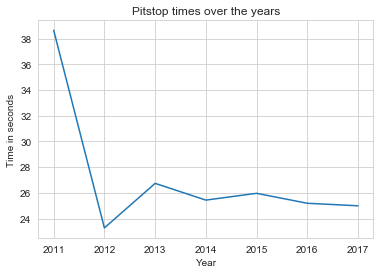

In [70]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("whitegrid")
sns.lineplot(x=pit_stops_average_df.Year, y=pit_stops_average_df.Average_pit_time);
plt.ylabel('Time in seconds')
plt.title('Pitstop times over the years')

### As seen from the line graph plotted above, pitstop times took a huge plunge in 2012 after the introduction of new rules. A decrease by approximately 15 seconds, a significant amount of time given the pace at which Formula 1 is played.<br> <br>It should be noted that this time is calculated from when a driver enters the pitstop lane and exits it, not just for the work that is done during the pitstop.<br> <br>A rise in trend can be seen from the year 2012 to 2013. This increase is due to explosive tyre bursts mid race, caused in part by the manufacturing deficiencies of Pirelli's tyres. Mid race tyre bursts resulted in drivers having to visit pitstops more often. Overall, pitstop times have been gradually declining over the years and are helping constructors achieve clock times like never before.

## <u>Analysis 4:</u>  Which constructor has won the most races at a particular circuit?

In [71]:
racesCopy['circuitId']=racesCopy['circuitId'].astype('int')

In [72]:
racesCopy=racesCopy.reset_index()

In [73]:
circuitsCopy=circuitsCopy.reset_index()

In [74]:
circuitsCopy['circuitId']=circuitsCopy['circuitId'].astype('int')

In [75]:
dataCirc=pd.merge(circuitsCopy, racesCopy, on='circuitId', how='left')

In [76]:
dataCirc[['circuitId','Name_x','Location','country','raceId']]

circuitId                          Name_x    Location     country  raceId
0            1  Albert Park Grand Prix Circuit   Melbourne   Australia     1.0
1            1  Albert Park Grand Prix Circuit   Melbourne   Australia    18.0
2            1  Albert Park Grand Prix Circuit   Melbourne   Australia    36.0
3            1  Albert Park Grand Prix Circuit   Melbourne   Australia    55.0
4            1  Albert Park Grand Prix Circuit   Melbourne   Australia    71.0
..         ...                             ...         ...         ...     ...
993         71                  Sochi Autodrom       Sochi      Russia  1004.0
994         72    Port Imperial Street Circuit  New Jersey         USA     NaN
995         73               Baku City Circuit        Baku  Azerbaijan   955.0
996         73               Baku City Circuit        Baku  Azerbaijan   976.0
997         73               Baku City Circuit        Baku  Azerbaijan   992.0

[998 rows x 5 columns]

In [77]:
constructorStandingsCopy=constructorStandingsCopy.reset_index()

In [78]:
dataCirc2=pd.merge(dataCirc, constructorStandingsCopy, on='raceId', how='left')

In [79]:
pd.set_option("display.max_rows", 12000)
#data3.head()

In [80]:
dataCirc2[dataCirc2['Position']==1.0].head()

circuitId   CircuitRef                          Name_x   Location  \
8           1  albert_park  Albert Park Grand Prix Circuit  Melbourne   
9           1  albert_park  Albert Park Grand Prix Circuit  Melbourne   
24          1  albert_park  Albert Park Grand Prix Circuit  Melbourne   
36          1  albert_park  Albert Park Grand Prix Circuit  Melbourne   
37          1  albert_park  Albert Park Grand Prix Circuit  Melbourne   

      country  Latitude Longitude  \
8   Australia  -37.8497   144.968   
9   Australia  -37.8497   144.968   
24  Australia  -37.8497   144.968   
36  Australia  -37.8497   144.968   
37  Australia  -37.8497   144.968   

                                                URL_x  raceId    Year  Round  \
8   http://en.wikipedia.org/wiki/Melbourne_Grand_P...     1.0  2009.0    1.0   
9   http://en.wikipedia.org/wiki/Melbourne_Grand_P...    18.0  2008.0    1.0   
24  http://en.wikipedia.org/wiki/Melbourne_Grand_P...    36.0  2007.0    1.0   
36  http://en.wikipedia.org/wiki/Melbourne_Grand_P...    55.0  2006.0    3.0   
37  http://en.wikipedia.org/wiki/Melbourne_Grand_P...    71.0  2005.0    1.0   

                   Name_y       Date      Time  \
8   Australian Grand Prix  3/29/2009   6:00:00   
9   Australian Grand Prix  3/16/2008   4:30:00   
24  Australian Grand Prix  3/18/2007   3:00:00   
36  Australian Grand Prix   4/2/2006  14:00:00   
37  Australian Grand Prix   3/6/2005  14:00:00   

                                                URL_y Weather  \
8   http://en.wikipedia.org/wiki/2009_Australian_G...   Sunny   
9   http://en.wikipedia.org/wiki/2008_Australian_G...     NaN   
24  http://en.wikipedia.org/wiki/2007_Australian_G...     NaN   
36  http://en.wikipedia.org/wiki/2006_Australian_G...     NaN   
37  http://en.wikipedia.org/wiki/2005_Australian_G...     NaN   

    constructorStandingsId  constructorId  Points  Position positionText  Wins  
8                   4038.0           23.0    18.0       1.0            1   1.0  
9                      1.0            1.0    14.0       1.0            1   1.0  
24                 25733.0            6.0    13.0       1.0            1   1.0  
36                  6339.0            4.0    42.0       1.0            1   3.0  
37                   567.0            4.0    16.0       1.0            1   1.0

In [81]:
#dataCircConst=dataCirc2.groupby(['circuitId','constructorId']).count()

In [82]:
dataCircConst=dataCirc2.groupby(['circuitId','constructorId']).count().sort_values(by='Wins',ascending=False)

In [83]:
dataCircConst_copy=dataCircConst

In [84]:
dataCircConst_copy_index=dataCircConst_copy.reset_index()

In [85]:
dataCricConstDf=pd.DataFrame(dataCircConst_copy_index.groupby(by='circuitId')['Wins'].max())

In [86]:
mergedDf_CircConst=pd.merge(dataCircConst_copy_index, dataCricConstDf, on=['circuitId','Wins'], how='inner')

In [87]:
mergedDf_CircConst_filtered=mergedDf_CircConst[['circuitId','constructorId','Wins']]

In [88]:
mergedDf_CircConst_filtered.sort_values(by=['circuitId','constructorId'],ascending=True).head()

circuitId  constructorId  Wins
24          1            6.0    22
27          2            1.0    19
28          2            3.0    19
26          2            6.0    19
44          3            1.0    13

In [89]:
mergedDf_CircConst_merged=pd.merge(mergedDf_CircConst_filtered, circuitsCopy, on='circuitId', how='left')

In [90]:
for index, row in mergedDf_CircConst_merged.iterrows():
    s = constructorCopy[constructorCopy['constructorId']==row['constructorId']]['Name']
    mergedDf_CircConst_merged.at[index,'constructorname']=(s.to_string(index=False))

In [91]:

fig = go.Figure(data=[
    go.Bar(name='Wins', x=mergedDf_CircConst_merged.CircuitRef, y=mergedDf_CircConst_merged.Wins, text = mergedDf_CircConst_merged.constructorname, textposition='auto', hovertext=mergedDf_CircConst_merged.constructorname),
#     go.Bar(name='6:30PM Section', x=candy_df[candy_df.Section == '6:30PM'].Candy, y=candy_df[candy_df.Section == '6:30PM'].Count),
])

fig.update_layout(barmode='group')
fig.show()

### The above stacked graph represents the number of wins by a specific constructor at a particular race circuit. Instances of the stacked graph can be seen in the case of a tie between two or three constructors. Hovering over the stack provides information about the constructor and the number of wins.

### Monaco has the most wins by a single constructor (Ferrari) in the history of the sport. This analysis is important, as it gives us an idea of which constructors have outperformed their competitors at a certain circuit over the years and provides insight on who might win at these circuits in the future.

## <u>Analysis 5:</u> The most challenging circuits

### Nelson Piquet once said, racing at Monaco—by far the most famous street circuit of them all—was "like trying to cycle around your living room."

### Most races end up with some drivers retiring and not being able to finish the race. Primary reasons behind this are engine failures and difficult circuits.

### The most challenging circuits are street circuits as the ones that are typically small and do not allow for standard overtaking maneuvers to be performed. These circuits are the ones that are prone to accidents and more number of drivers retire in these types of circuits than any other.

In [92]:
res=results


In [93]:
race=racesCopy

In [94]:
values = {'position': -1, 'number': -1, 'time': 0, 'milliseconds': 0}
res=res.fillna(value=values)

In [95]:
dataMergeRaceResult=pd.merge(res, race, on='raceId', how='left')


In [96]:
dataMergeRaceResult=dataMergeRaceResult[dataMergeRaceResult['position'] == -1.0]


In [97]:
dataResRaceGrp=dataMergeRaceResult.groupby(['circuitId']).count().sort_values(by='raceId',ascending=False)

In [98]:
dataResRaceGrp=dataResRaceGrp.reset_index()

In [99]:
dataResRaceGrp[['circuitId','number']].head()

circuitId  number
0          6     843
1         14     796
2          9     527
3         13     464
4          7     444

In [100]:
dataResRaceCircMerged=pd.merge(dataResRaceGrp, circuitsCopy, on='circuitId', how='left')

In [101]:
dataResRaceCircMerged[['circuitId','number','Latitude','Longitude']].head()

circuitId  number Latitude Longitude
0          6     843  43.7347   7.42056
1         14     796  45.6156   9.28111
2          9     527  52.0786  -1.01694
3         13     464  50.4372   5.97139
4          7     444     45.5  -73.5228

In [102]:
fig = go.Figure(go.Densitymapbox(lat=dataResRaceCircMerged.Latitude, lon=dataResRaceCircMerged.Longitude, z=dataResRaceCircMerged.number, radius=35))
fig.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=180)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### According to Bleacher Report, the 'Circuit De Monaco' is the most challenging circuit in the world. As seen in the visualization above, this circuit has had the most driver retirements standing at 843 followed by 'Autodromo Nazionale di Monza' in second. 

### Although the track in Monza is not a street circuit, it has high curve speeds which have resulted in numerous fatal crashes and other accidents. Only drivers with proper technique and superior aerodynamic efficiency are able to challenge for top spots here.

### Another track which is very challenging is the 'Circuit Gilles Villeneuve' in Montreal, Canada and is rightly fourth on the list of most retired drivers.


# <u>Analysis 6:</u> Formula 1- A global sport

In [103]:
circuitMap['Raceloc'] = 0
circuit_id_list = list(race2[race2['Year'] == 2018]['circuitId'])

circuit_id_list

[1, 3, 17, 73, 4, 6, 7, 34, 70, 9, 10, 11, 13, 14, 15, 71, 22, 69, 32, 18, 24]

In [104]:
circuit_id_list_notlive_i = list(race2[race2['Year'] != 2018]['circuitId'])
circuit_id_list_notlive = [x for x in circuit_id_list_notlive_i if x not in circuit_id_list]
# len(circuit_id_list_notlive)
# len(circuit_id_list)

# circuitsCopy[~circuitsCopy['circuitId'].isin(circuit_id_list)]['Raceloc'] = 1
circuit_id_list 
# circuit_id_list

for rowId in circuit_id_list:
     circuitMap.loc[str(rowId),'Raceloc'] = 1

In [105]:
circuitMap.head()

CircuitRef                            Name      Location  \
circuitId                                                              
1          albert_park  Albert Park Grand Prix Circuit     Melbourne   
2               sepang    Sepang International Circuit  Kuala Lumpur   
3              bahrain   Bahrain International Circuit        Sakhir   
4            catalunya  Circuit de Barcelona-Catalunya     MontmelÌ_   
5             istanbul                   Istanbul Park      Istanbul   

             country  Latitude Longitude  \
circuitId                                  
1          Australia  -37.8497   144.968   
2           Malaysia   2.76083   101.738   
3            Bahrain   26.0325   50.5106   
4              Spain     41.57   2.26111   
5             Turkey   40.9517    29.405   

                                                         URL  Raceloc  
circuitId                                                              
1          http://en.wikipedia.org/wiki/Melbourne_Grand_P...        1  
2          http://en.wikipedia.org/wiki/Sepang_Internatio...        0  
3          http://en.wikipedia.org/wiki/Bahrain_Internati...        1  
4          http://en.wikipedia.org/wiki/Circuit_de_Barcel...        1  
5               http://en.wikipedia.org/wiki/Istanbul_Park\n        0

In [106]:
import seaborn as sns
import plotly.graph_objects as go
mapbox_access_token = 'pk.eyJ1Ijoic3VtdWtoc2hhcm1hIiwiYSI6ImNrMm92bjJydzE3c3UzcHQ1Nzdjb3JwNHMifQ.x_ybvMGOCORXoXDYqnJCCg'
class_map_data1 = go.Scattermapbox(
        lon = circuitMap[circuitMap['Raceloc']!=1]['Longitude'],
        lat = circuitMap[circuitMap['Raceloc']!=1]['Latitude'],
        text = circuitMap[circuitMap['Raceloc']!=1]['Name'],
        hoverinfo='text',
        mode = 'markers',
        marker = dict(
                    color = 'red',
                    symbol = 'circle',
                    opacity = .5
                ),
        name = "Not live circuits"
)
class_map_data2 = go.Scattermapbox(
        lon = circuitMap[circuitMap['Raceloc']==1]['Longitude'],
        lat = circuitMap[circuitMap['Raceloc']==1]['Latitude'],
        text = circuitMap[circuitMap['Raceloc']==1]['Name'],
        hoverinfo='text',
        mode = 'markers',
        marker = dict(
                    color = 'green',
                    symbol = 'circle',
                    opacity = 1
                ),
        name = "Live circuits"
)

class_map_layout = go.Layout(
        title = 'Circuit Locations',
        mapbox=go.layout.Mapbox(
            accesstoken=mapbox_access_token,
            zoom=1
        )
    )

class_map = go.Figure(data=[class_map_data1,class_map_data2], layout=class_map_layout)
class_map.show()

### We can see from the graph above that Race circuits are spread out all across the globe. The green points on the map represent the locations of circuits that Formula 1 races currently take place, and the red points represent all the circuits where a race was held at some point of time in the past. Formula 1 is currently held across 6 continents and this shows how globally spread out the sport is.


## <u>Conclusions:</u>
 
1. The possibility of a driver winning is a race is largely influenced by the position that he starts the race in. Less than two percent of all drivers who have started a race from positions 4 and above have gone on to win the race<br>

2. Having won 121 races and 7 world championships, Michael Schumacher is the greatest driver of all time.<br>

3. Pitstop times have decreased considerably over the years with a significant decrease of ~15 seconds from 2011 to 2012. As more rules are changed in the future, we expect to see these statistics change again.<br>

4. There are a few circuits where one constructor has dominated over the years. However, there are other circuits where the top spot, in terms of number of wins, has been shared by different teams. Our circuits of interest mainly being Monaco and Monza, have a clear winning constructor, Ferrari, one of the most successful in the history of Formula 1.<br>

5. Street circuits are dangerous to race on and have resulted in numerous retirements and fatal crashes over the years. The 'Circuit de Monaco' stands out as the most dangerous circuit in the world with 873 retirements. Monza circuit in Italy is the most dangerous non-street circuit due to its high speed straights and tricky corners.<br>

6. Formula 1, having been organized in more than 70 circuits across different continents, is truly a global sport.

<Center> Thank you